In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize_scalar
from matplotlib import pyplot as plt

In [2]:
e1 = pd.read_csv('o.csv')
e2 = pd.read_csv('s.csv')
e3 = pd.read_csv('k.csv')
e4 = pd.read_csv('sh.csv')

In [3]:
e1

,Имя,Устрицы,Арахис,Молок,Макароны,Овсяное,Шоколад,Сырок,Кефир,Гречневая крупа
0,Устрицы,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0
1,Арахис,1.0,0.5,0.5,1.0,0.5,0.0,0.0,0.5,1.0
2,Молок,1.0,0.5,0.5,1.0,1.0,0.0,0.5,1.0,1.0
3,Макароны,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0
4,Овсяное,1.0,0.5,0.0,1.0,0.5,0.0,0.5,0.5,1.0
5,Шоколад,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
6,Сырок,1.0,1.0,0.5,1.0,0.5,0.0,0.5,1.0,1.0
7,Кефир,1.0,0.5,0.0,1.0,0.5,0.0,0.0,0.5,1.0
8,Гречневая крупа,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [4]:
e2

,Имя,Устрицы,Арахис,Молок,Макароны,Овсяное,Шоколад,Сырок,Кефир,Гречневая крупа
0,Устрицы,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0
1,Арахис,1.0,0.5,1.0,1.0,1.0,0.0,0.0,0.5,1.0
2,Молок,1.0,0.5,0.5,1.0,1.0,0.0,0.5,1.0,1.0
3,Макароны,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0
4,Овсяное,1.0,0.5,0.0,1.0,0.5,0.0,0.5,0.5,1.0
5,Шоколад,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
6,Сырок,1.0,1.0,0.5,1.0,NaN,0.0,0.5,1.0,1.0
7,Кефир,1.0,0.5,0.0,1.0,NaN,0.0,0.0,0.5,1.0
8,Гречневая крупа,1.0,0.5,1.0,0.5,1.0,0.0,0.0,0.0,0.5


In [5]:
data = []
for i in [e1, e2, e3, e4]:
    A = i.drop(['Имя'], axis=1).values
    for k in range(A.shape[1]):
        for j in range(A.shape[0]):
            if np.isnan(A[j,k]) and np.isnan(A[k,j]):
                A[j,k] = 0.5
                A[k,j] = 0.5
            elif np.isnan(A[j,k]):
                A[j,k] = A[k, j]
    data.append(A)

In [6]:
print(data[1])

[[0.5 0.  0.  0.5 0.  0.  0.  0.  1. ]
 [1.  0.5 1.  1.  1.  0.  0.  0.5 1. ]
 [1.  0.5 0.5 1.  1.  0.  0.5 1.  1. ]
 [0.5 0.  0.  0.5 0.  0.  0.  0.  1. ]
 [1.  0.5 0.  1.  0.5 0.  0.5 0.5 1. ]
 [1.  1.  1.  1.  1.  0.5 1.  1.  1. ]
 [1.  1.  0.5 1.  0.5 0.  0.5 1.  1. ]
 [1.  0.5 0.  1.  0.5 0.  0.  0.5 1. ]
 [1.  0.5 1.  0.5 1.  0.  0.  0.  0.5]]


In [7]:
A = data[1]
for k in range(data[1].shape[1]):
        for j in range(data[1].shape[0]):
            A[j, k] = 1/len(data)*data[0][j, k]+1/len(data)*data[1][j, k] +1/len(data)*data[2][j, k]+1/len(data)*data[3][j, k]

In [8]:
A

array([[0.5  , 0.   , 0.   , 0.5  , 0.   , 0.   , 0.   , 0.   , 1.   ],
       [1.   , 0.625, 0.625, 1.   , 0.625, 0.5  , 0.   , 0.5  , 1.   ],
       [1.   , 0.5  , 0.5  , 1.   , 1.   , 0.25 , 0.5  , 1.   , 1.   ],
       [0.5  , 0.   , 0.   , 0.5  , 0.   , 0.   , 0.   , 0.   , 1.   ],
       [1.   , 0.5  , 0.   , 1.   , 0.5  , 0.   , 0.5  , 0.375, 1.   ],
       [1.   , 1.   , 0.875, 1.   , 1.   , 0.5  , 0.75 , 1.   , 1.   ],
       [1.   , 1.   , 0.5  , 1.   , 0.5  , 0.25 , 0.5  , 1.   , 1.   ],
       [1.   , 0.375, 0.   , 0.75 , 0.625, 0.25 , 0.   , 0.5  , 1.   ],
       [0.25 , 0.125, 0.25 , 0.125, 0.25 , 0.   , 0.   , 0.   , 0.5  ]])

In [9]:
k = np.ones(A.shape[1])
k_old = k
lam = np.ones(A.shape[1])@A@k_old
f = 25
k

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
while f > 0.0000001:
    temp = k
    k = 1/lam*A@k_old
    k_old =k
    lam = np.ones(A.shape[1])@A@k_old
    f = np.linalg.norm(k - k_old)

In [11]:
print(k) #Устрицы	Арахис	Молок	Макароны	Овсяное	Шоколад	Сырок	Кефир	Гречневая крупа

[0.04719764 0.13864307 0.15929204 0.04719764 0.11504425 0.19174041
 0.15929204 0.10619469 0.03539823]


In [12]:
шоколад сырок молоко овсяное  арахис кефир макароны устрицы гр крупа

SyntaxError: invalid syntax (<ipython-input-12-de16d740d1ae>, line 1)

In [40]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 30

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)
svyato_rating = np.array([9,6,7,4,8,2,1,3,5])

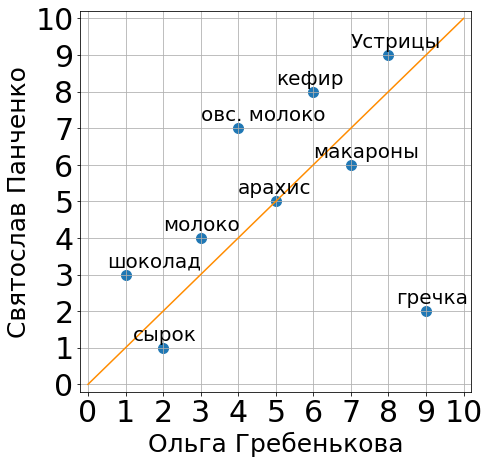

In [111]:
plt.figure(figsize=[7,7])
plt.xlim([-0.2,10.2])
plt.ylim([-0.2,10.2])
plt.xlim([-0.2,10.2])
plt.ylim([-0.2,10.2])
plt.scatter([8,5,3,7,4,1,2,6,9], svyato_rating,s=100)
plt.plot([0,10],[0,10], color='darkorange')
plt.xlabel(r'Ольга Гребенькова', fontsize=25)
plt.ylabel(r'Святослав Панченко', fontsize=25)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.text(1.2, 1.2, 'сырок', fontsize=20)
plt.text(0.5, 3.2, 'шоколад', fontsize=20)
plt.text(8.2, 2.2, 'гречка', fontsize=20)
plt.text(6, 6.2, 'макароны', fontsize=20)
plt.text(2, 4.2, 'молоко', fontsize=20)
plt.text(4, 5.2, 'арахис', fontsize=20)
plt.text(5, 8.2, 'кефир', fontsize=20)
plt.text(3, 7.2, 'овс. молоко', fontsize=20)
plt.text(7, 9.2, 'Устрицы', fontsize=20)
plt.grid()
plt.savefig('rustem_vs_svyato.pdf',bbox_inches='tight', pad_inches=0.5)

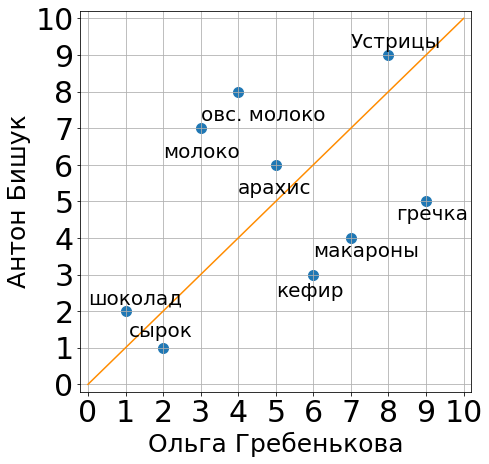

In [41]:
plt.figure(figsize=[7,7])
plt.xlim([-0.2,10.2])
plt.ylim([-0.2,10.2])
plt.xlim([-0.2,10.2])
plt.ylim([-0.2,10.2])
plt.scatter([8,5,3,7,4,1,2,6,9], svyato_rating,s=100)
plt.plot([0,10],[0,10], color='darkorange')
plt.xlabel(r'Ольга Гребенькова', fontsize=25)
plt.ylabel(r'Антон Бишук', fontsize=25)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.text(1.1, 1.3, 'сырок', fontsize=20)
plt.text(0, 2.2, 'шоколад', fontsize=20)
plt.text(8.2, 4.5, 'гречка', fontsize=20)
plt.text(6, 3.5, 'макароны', fontsize=20)
plt.text(2, 6.2, 'молоко', fontsize=20)
plt.text(4, 5.2, 'арахис', fontsize=20)
plt.text(5, 2.4, 'кефир', fontsize=20)
plt.text(3, 7.2, 'овс. молоко', fontsize=20)
plt.text(7, 9.2, 'Устрицы', fontsize=20)
plt.grid()
plt.savefig('rustem_vs_anton.pdf',bbox_inches='tight', pad_inches=0.5)

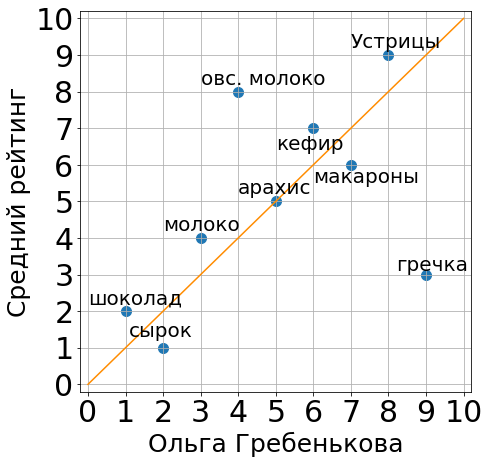

In [39]:
plt.figure(figsize=[7,7])
plt.xlim([-0.2,10.2])
plt.ylim([-0.2,10.2])
plt.xlim([-0.2,10.2])
plt.ylim([-0.2,10.2])
plt.scatter([8,5,3,7,4,1,2,6,9], svyato_rating,s=100)
plt.plot([0,10],[0,10], color='darkorange')
plt.xlabel(r'Ольга Гребенькова', fontsize=25)
plt.ylabel(r'Средний рейтинг', fontsize=25)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
plt.text(1.1, 1.3, 'сырок', fontsize=20)
plt.text(0, 2.2, 'шоколад', fontsize=20)
plt.text(8.2, 3.1, 'гречка', fontsize=20)
plt.text(6, 5.5, 'макароны', fontsize=20)
plt.text(2, 4.2, 'молоко', fontsize=20)
plt.text(4, 5.2, 'арахис', fontsize=20)
plt.text(5, 6.4, 'кефир', fontsize=20)
plt.text(3, 8.2, 'овс. молоко', fontsize=20)
plt.text(7, 9.2, 'Устрицы', fontsize=20)
plt.grid()
plt.savefig('rustem_vs_avg.pdf',bbox_inches='tight', pad_inches=0.5)